In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df= pd.read_csv("/content/sample_data/results4.csv")

In [ ]:
df.head(5)

,Unnamed: 0,id,rating,date,source,reviews,snippet
0,0,0.0,5.0,2024-02-04 09:49:54+00:00,Google,6.0,لو اقدر احط مليون نجمه حطيت بصراحه تعاملهم سهل...
1,0,1.0,5.0,2023-11-20 17:19:47+00:00,Google,3.0,حبيت اعلق ع الكلام السلبي\nاول شي معروف انهم م...
2,0,2.0,5.0,2018-03-18 10:38:01+00:00,Google,476.0,ما شاء الله تبارك الله استقبال ممتاز ومتعاونين...
3,0,3.0,5.0,2024-02-21 12:55:43+00:00,Google,8.0,اشكر الاستشاريه د.رابعه ماشاء الله قمه وحسن خل...
4,0,4.0,5.0,2023-09-21 05:53:52+00:00,Google,6.0,جزاهم الله خير متعاونين وخدومين خاصه الاستقبال...


In [ ]:
df.to_csv("data3.csv")

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
from camel_tools.sentiment import SentimentAnalyzer
sa = SentimentAnalyzer("CAMel-Lab/bert-base-arabic-camelbert-msa-sentiment")
sentiments = df['snippet'].to_list()
results = sa.predict(sentiments)
dates =df['date'].to_list()
result_df = pd.DataFrame({"label":results ,"date":dates})

In [ ]:
result_df.head(5)

,label,date
0,positive,2024-02-04 09:49:54+00:00
1,positive,2023-11-20 17:19:47+00:00
2,positive,2018-03-18 10:38:01+00:00
3,positive,2024-02-21 12:55:43+00:00
4,positive,2023-09-21 05:53:52+00:00


In [ ]:
result_df['label'].value_counts()

label
neutral     42
negative    35
positive    19
Name: count, dtype: int64

In [ ]:
result_df.to_csv("final_results2.csv")

In [5]:
df["snippet"].isnull().sum()

28

In [6]:
df.dropna(inplace=True)

In [7]:
df["snippet"].isnull().sum()

0

In [18]:
import re
chars = ''.join(map(re.escape, df['snippet']))

chars


'لو\\ اقدر\\ احط\\ مليون\\ نجمه\\ حطيت\\ بصراحه\\ تعاملهم\\ سهل\\ ومريح\\ خصوصًا\\ موظف\\ الاستقبال\\ قسم\\ المختبر\\ \\(\\ عبدالعزيز\\ الحربي\\)\\ اشكره\\ جزيل\\ الشكر\\ الله\\ يسعده\\ على\\ تعامله\\ وسرعة\\ خدمته\\ 👍🏻حبيت\\ اعلق\\ ع\\ الكلام\\ السلبي\\\nاول\\ شي\\ معروف\\ انهم\\ ماراح\\ يردون\\ من\\ ضغط\\ الشغل\\\nالشي\\ الثاني\\ الططاقم\\ متفاهم\\ ومتكاتف\\ ويبتسمون\\ في\\ وجهك\\ ويساعدونك\\\nالخدمه\\ سريعه\\ ويخلصونك\\\nوبالنهايه\\ اشكر\\ كل\\ موظف\\ فيه\\ وعلى\\ راسهم\\ استاذ\\ حمدما\\ شاء\\ الله\\ تبارك\\ الله\\ استقبال\\ ممتاز\\ ومتعاونين\\ لكن\\ المشكلة\\ ما\\ يقدرون\\ ويراعون\\ المرضى\\ المحتاجين\\ لأمر\\ طارئ\\ يقولك\\ الاستقبال\\ لازم\\ موعد\\.\\.\\ الله\\ المستعاناشكر\\ الاستشاريه\\ د\\.رابعه\\ ماشاء\\ الله\\ قمه\\ وحسن\\ خلق\\ وتفاهم\\ مع\\ كبار\\ السن\\ نفخر\\ بامثالها\\ من\\ بناتناجزاهم\\ الله\\ خير\\ متعاونين\\ وخدومين\\ خاصه\\ الاستقبال\\ والصيدليه\\ والعاملين\\ في\\ عيادة\\ القدم\\ ماعدا\\ موظف\\ الاستقبال\\ يحس\\ انه\\ وزير\\ الصحهالحمدلله\\ الذي\\ بنعمته\\ تتم\\ الص

In [29]:
chars=chars.replace("\\",'')
chars=chars.replace("\n",'')
chars=chars.replace("%",'')
chars=chars.replace("%s ",'')

In [30]:
chars

'لو اقدر احط مليون نجمه حطيت بصراحه تعاملهم سهل ومريح خصوصًا موظف الاستقبال قسم المختبر ( عبدالعزيز الحربي) اشكره جزيل الشكر الله يسعده على تعامله وسرعة خدمته 👍🏻حبيت اعلق ع الكلام السلبياول شي معروف انهم ماراح يردون من ضغط الشغلالشي الثاني الططاقم متفاهم ومتكاتف ويبتسمون في وجهك ويساعدونكالخدمه سريعه ويخلصونكوبالنهايه اشكر كل موظف فيه وعلى راسهم استاذ حمدما شاء الله تبارك الله استقبال ممتاز ومتعاونين لكن المشكلة ما يقدرون ويراعون المرضى المحتاجين لأمر طارئ يقولك الاستقبال لازم موعد.. الله المستعاناشكر الاستشاريه د.رابعه ماشاء الله قمه وحسن خلق وتفاهم مع كبار السن نفخر بامثالها من بناتناجزاهم الله خير متعاونين وخدومين خاصه الاستقبال والصيدليه والعاملين في عيادة القدم ماعدا موظف الاستقبال يحس انه وزير الصحهالحمدلله الذي بنعمته تتم الصالحات..اللهم لك الحمد والشكر على نعمك التي لا تعد ولا تحصى.النظافة والترتيب ممتاز جدا جدا.وتوفر المواقف ويجري عليه التصليحات والترتيبات والصيانه. في ظل حكومتنا الرشيده.اللهم ادم علينا نعمة الأمن والأمان والاستقرار في بلادنا ، ولجميع بلدان المسلمين.. يا حي يا

In [38]:
t=''
with open("/content/sample_data/text2.txt", "r") as text_file:
    t=text_file.read()
t =  t.replace(" ",'')

AttributeError: 'list' object has no attribute 'replace'

In [51]:
from ar_wordcloud import ArabicWordCloud
awc = ArabicWordCloud(background_color="white",font='NotoNaskhArabic-Regular.ttf')
wc = awc.from_file('/content/sample_data/text2.txt')


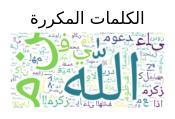

In [52]:
awc.plot(wc, title="الكلمات المكررة", width=2, height=2)

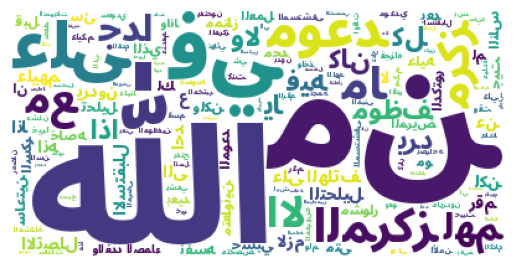

In [47]:
plt.imshow(wc)
plt.axis("off")
plt.show()

In [53]:
!pip install wordcloud
!pip install arabic-reshaper
!pip install python-bidi

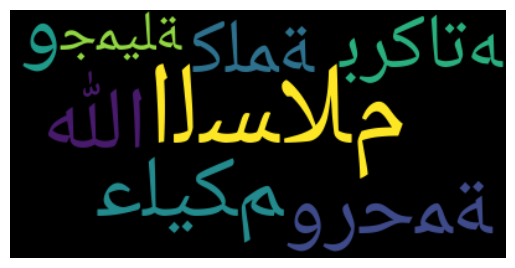

In [55]:
from collections import Counter

from wordcloud import WordCloud          # pip install wordcloud
import matplotlib.pyplot as plt
# -- Arabic text dependencies
from arabic_reshaper import reshape      # pip install arabic-reshaper
from bidi.algorithm import get_display   # pip install python-bidi

rtl = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter("السلام عليكم ورحمة الله و بركاته السلام كلمة جميلة".split())
counts = {rtl(k):v for k, v in COUNTS.most_common(10)}

font_file = '/content/sample_data/NotoNaskhArabic-Regular.ttf' # download from: https://www.google.com/get/noto
wordcloud = WordCloud(font_path=font_file).generate_from_frequencies(counts)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [58]:
from collections import Counter

data_set =""" لو اقدر احط مليون نجمه حطيت بصراحه تعاملهم سهل ومريح خصوصًا موظف الاستقبال قسم المختبر ( عبدالعزيز الحربي) اشكره جزيل الشكر الله يسعده على تعامله وسرعة خدمته  حبيت اعلق ع الكلام السلبياول شي معروف انهم ماراح يردون من ضغط الشغل الشي الثاني الططاقم متفاهم ومتكاتف ويبتسمون في وجهك ويساعدونكالخدمه سريعه ويخلصونكوبالنهايه اشكر كل موظف فيه وعلى راسهم استاذ حمدما شاء الله تبارك الله استقبال ممتاز ومتعاونين لكن المشكلة ما يقدرون ويراعون المرضى المحتاجين لأمر طارئ يقولك الاستقبال لازم موعد.. الله المستعاناشكر الاستشاريه د.رابعه ماشاء الله قمه وحسن خلق وتفاهم مع كبار السن نفخر بامثالها من بناتناجزاهم الله خير متعاونين وخدومين خاصه الاستقبال والصيدليه والعاملين في عيادة القدم ماعدا موظف الاستقبال يحس انه وزير الصحهالحمدلله الذي بنعمته تتم الصالحات..اللهم لك الحمد والشكر على نعمك التي لا تعد ولا تحصى.النظافة والترتيب ممتاز جدا جدا.وتوفر المواقف ويجري عليه التصليحات والترتيبات والصيانه. في ظل حكومتنا الرشيده.اللهم ادم علينا نعمة الأمن والأمان والاستقرار في بلادنا ، ولجميع بلدان المسلمين.. يا حي يا قيوم يا قدير يا عزيز يا رب العالمين.مرتب ومنظم والاستقبال متعاونين يبذلون جهد يشكرون عليه ،لكن مايردون على الاتصال وهو مهم مو كل من اراد يستفسر يروح للمركز يزدحم ع الفاضيربي يشفي المسلمينمركز نظيف جداً وطاقم متعاونين الله يكتب أجرهم ياربمركز السكر والغدد الصماء متخصص بمرضى السكريحتاج زيادة في الكوادر الطبيهخدمتهم رائعه الله يوفقهم ويكتب لهم الاجرلو سمحتوا اللي يعرف يقول متى يفتح التحليل برمضانمركز متميز للغدد الصماء والسكرملاحظة المختبر في المبنى الغربي (مركز القدم السكرية)طاقم طبي سعودي يفتخربهموكل الموظفين   توفر مواقف السياراترائعممتازرائعالسلام عليكم، حاولت اني أعدل موعدي دون حضوري للمستشفى بحكم بعدي عنه فلم استطع، رغم انه رد علي موظف وحاول انه يحولني للمواعيد ولم تنجح تحويلاته فلا اجابة، ولكن لم ذهبت للمستشفى كان المستشفى قد أغلق مع الاسف كنت متأخرًا بحكم وقت دراستي واشغالي، ولكن اتى إلي يبدو انه موظف صاحب مازدا سوداء واخذ اوراقي وخدمني وقال بكرا نعدل موعدك وصار كما وعد فجزاه الله خيرًا وكثر الله من امثاله نموذج مشرف لأبنائنا الموظفيين السعوديين، وكذلك حارس الأمن شخص راقي ومحترم ويعاملك بلطف فجزاه الله خيرًا.مركز تابع
 لمستشفى الملك فهد التخصصي وهو مستقل ويعالج السكري والغدد الصماء ، اتابع معهم من سنوات، استقبال ببشاشة واخلاص رغم ضغط العمل عليهم،جزاهم الله خير، المشكلة الوحيدة هي المواعيد فهي متباعدة واحيانا تكون الحالة لاتستدعي المتابعة الدقيقة والسريعة اي تكون في حالة الاستقرار، المبنى تم تجديده وكان قديما التحاليل تعملها في المستشفى الان صار عندهم مختبر مستقل.. الله يشفي كل مريض... وحفظ الله بلادنا من كل مكروهالله يديم الخير في بلدنامركز متخصص لمرضي السكري وموجود به علاج دوري علي حسب الحالةمتى اوقات العمل ؟كيف اقدر احجز موعد ؟ممتاز ونظيفجميييييلالانتظار طويل ٣ ساعات مرة تعب علينا موعد بالساعه واذا جيت موعد دخول ورقي بالارقام  الموظفين معاملاتهم جداً ممتازة لكنطول الانتظار يراجع من فظلكم  زحمهليه ماحطو مته يفتحون  يحتاج إدارة أفضلاتمنى يتم الغاء الهاتف من عندكم لعدم وجود فاىدة منه وتوفير لفاتورة الهاتفبعدل موعد وانا بعيد ماقدرت الا عن طريق 937من يرغب يتواصل معهم لازم يتصل937 وهم يرجعون يتصلون عليك بنفس شينةيحتاج التزام ومواظبة اكثر لبعض للدكاترة والموظفينممتازين لكن لديهم شيء سيء بصراحه لا يردون على الهاتف ابداًاحمد العجلانموضف وزاره الصحهمستشفي الملك فهد التخصصي ببريدهكان رايس قسم مركز السكرعليه قضايا فسادشالته مكافحت الفساد ونسجن 5 شهورانسان ظالم الله لا يوفقه وًلسة يظلم في الناس انسان حقير الله يلعنه يارب في شهر رمضان مبارك دا يحب يتعدى على الناس و ضميره مرتاحليس سيى ولكن في بعض الاحيان يرفضوا دخول المرافق مع المريض الى التحليل مع العلم ان الاغلبية كبار السن  مركز مهمل ومتعب. تخيلوا جيت اسوي تحليل قالوا مو مسجل عندنا التحليل روحي للعياده الفلانيه يسجلون لك التحليل واجلس انتظار ثاني  لاحول ولاقوة الا باللهمجمع فاشل بما تعنيه الكلمه والاتصال من السبع المستحيلات يردون عليه وهذا يدل على فشل الاداره واتمنى صوتنا ياصلل لاي مسئول لان التعليقات كلها سلبيه !نجمة لأنهم مستحيل يردون على الاتصال انا بعيد عن المركز واحتاج اعادة صرف وصفة وماقدرت اكلمهم لان ما احد يردمايردون ع الاتصال مستحيل وانا مكاني بعيد وابي اعاده صرفاتمنى أحد يرد على الهاتف ….تقريباً من الساعة ٩:٤٥ الى ١٠:٣٥ صباحا .. وعلى جميع التحويلات (١-٢-٣-٤-٥-٠) ولا أحد يرد ..حبيت استفسر :أبعد عن المركز أكثر من ١٠٠كلم .. كيف نفتح ملف بالمركز ؟؟ علماً أنه لدي ملف بالمستشفى والمركز الذي اراجع فيه ؟؟وكيف نتواصل مع المركز خصوصاً مع وجود الدوام + البعد عن المركز ؟؟صراحه كنت افكر اروح لهذا المركز لكن صدمت بالتعليقات ماتبشر بالخير  ليه كذا يامركز السكر والغدد الصماء ،،احرصو على الارتقاء بالمكان الذي تعملون فيه ليصل لرضاء المريض خاصه انكم مركز يستقبل مرضى محتاجين رعايه واهتمام وليس لتجاره والارباحمركز ازفت من الزفت يلطعونك ساعه ساعتين انتظار وروح وتعال واخرتها حضرت الدكتوره ما داومت، وانا جالس بالانتظار شفت الفلته والتسيب من دكتوره مصريه تكلم ممرض بالمختبر تقوله انا ماشيه يقولها طيب كملي الشغله الفلانيه وتقوله مقدرش والدكتوره الثانيه شغاله مكالمات ودق حنك مع زميلتها في مواضيع خارج العمل وتافهه وتاركه المراجع ينتظر حضرتها تخلص سوالفها اللي ماتخلص،، الأكيد انك تطلع مصاب بأحد حالتين، اما ضارب فيك عرق من كثر الضغط او نفسيه وتدخل في معمعه المصحات النفسيه، لانه مركز يجيب المرض ما يعالجهيحتاج الى الالتزام بالمواعيد المسجلة للمرضى ، من غير المعقول يأتي المريض في نفس تاريخ وساعة الموعد ويأخذ رقم للانتظار وتمضي الساعات ولم يقابل الدكتور الا بعد مشقة ، ومن جاء قبله واخذ رقم هو المقدم على ..!المفروض ترتيب الدخول للدكتور بنفس ساعة الموعد في الكرت وليس برقم الانتظار .وشكراًالحين متى يتردون علييي وبعدين يعني؟؟يجب الرقابة والانظباط الوظيفي عليهممكان مزدحم جدا وتنظيم سيئ الله يكون بعون المراجعينفي الاونه الاخيره المركز فاشل في ادارة الازمات عندي موعد تحليل وحضرت قبل مايفتح المركز من الساعه ٧ صباحا موعدي السابق لم يحدد موعد تحليل باليوم بل كان الموعد قبل موعد الدكتور  بعشر ايام فقط بدون تحديد وقت وايضا وصلت لي رساله تأكيددخلت المركز وبعد نص ساعه بدت الفوضى المراجعين اعداد كبيره وكثير منهم نفس طريقتي لم يحدد لهم موعد سابق باليوم والساعه تعال شف الفوضى  طبعا حنا كانت مواعيدنا له اكثر من ٦ شهورجينا تخيل كلامهم لنا انتظرو لحد مايخلصون الي لهم مواعيد بعدين يجي دوركم وش هالكلام حنا مالنا ذنب جينا على حسب كلامكم ونروح للمدير وكلامه هذا النظام جايز لك والا رح خذ موعد جديد  واجلس انتظر الى الساعه ١١ حسبي الله ونعم الوكيل والي زاد الطين بله حارسة امن شايفتن نفسه على المراجعين وتهوش وتزمر اسمه حصه الدكاتره ماسوو سواته.   الي مابه شي يمرض اذا شاف الموقف …الله يغنينا عنهم بالصحه والعافيه ،لا فائده من الاتصال لي ساعتين اتصل ولا احد يرد  اتصل على 937الله يعين بعد صلاة الظهر ابروح اطق لهم مشوار والمشكله ان ماحصلت علاج بسبب ان محد يرد على الهاتف ردو عشان اعرف اذا موجود العلاج مو اجي ول احصل..انا الصراحة ما ادري ليش حاطين رقم هاتف شكل يعني انا اتمنى انو احد يبلغ على التسيب ذا لنو فيه إرهاق على بعض الناس بدال ما تردون عليهم تخلونهم يطقون مشوار للمركز ليش؟! ما اقول الا حسبي الله على من كان السببالهاتف أقترح عليهم يلغونه لأن ماله فايده ماعمرهم ردوا على المكالماتالتاخير بالساعات ماهو معقوله الدكتور يسولف ع المرضى وبارد ويطقق بالواتس ومنتطرين ساعتين ونص علشان ادخل عليهسيء في التواصل محد يرسل تدق عليهم قرن كامل محد يرد يرفعون السناعة ويقفلون الكلام هذا ينطبق على جميع التحويلاتحاطين رقم ومت ادق على كل التحويلات ما فيه استجابه ! ابي بس طريقه حجز موعد ومتى اوقات عملهم اخاف اطلع بذا الشموس والحر بدون نتيجه ! مركز سيء ولايردون على الهاتق اذا بتحجز لازم تعني لهم ولا يفتحون الا ٣ ساعات مايردون على الهاتف نهائي نهائي لازم تروح لهم وتطق مشوار عشان تعدل موعدكامس جيت ابغى تثقيف بالابر ماحد يعطيك وجه الا اذا كان تعرفين احد واسطة وبسالعلاجات عندهم ماتاخذها الا بعد شكاوي لوزارة الصحة ومرمطه دائما مخلصهفيه دكتور سعودي شايف نفسه وله عيادة خاصه نفسه شييينه عيادته تحتالتعامل سئ والمواعيد بعيدة واللى بالاستقبال قليل أدب وتعامله سئ جدا والمستشفى كله سئ ليس بس مركز السكر والغددلو في اقل من نجمه كان عطيتهم مافي تنظيم ولا شيالدكتورات المصريات مهملات ولايشتغلون ويطلعون قبل الوقتللأسف مسـتواهم بـإنحـدار ووجـود الهـاتف كعـدمه .الرقم حاطينه تسكيته حسبي الله عليهمفاشل ومايردون على التلفون ساعةسلام عليكم متى يفتح المركز في رمضان؟المفروض يشيلون الرقم اذا مب رادينلايردون على الهاتف
"""
# split() returns list of all the words in the string
split_it = data_set.split()

# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)

# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(40)

print(most_occur)

[('على', 24), ('الله', 20), ('من', 20), ('في', 20), ('موعد', 10), ('المركز', 9), ('ما', 8), ('مع', 7), ('الا', 7), ('لهم', 6), ('الهاتف', 6), ('مركز', 6), ('موظف', 5), ('كل', 5), ('فيه', 5), ('ولا', 5), ('يا', 5), ('كان', 5), ('يرد', 5), ('اذا', 5), ('الاستقبال', 4), ('ع', 4), ('يردون', 4), ('لازم', 4), ('انه', 4), ('،', 4), ('الاتصال', 4), ('الصماء', 4), ('التحليل', 4), ('عن', 4), ('الى', 4), ('احد', 4), ('رقم', 4), ('لكن', 3), ('متعاونين', 3), ('خاصه', 3), ('الذي', 3), ('لك', 3), ('لا', 3), ('جدا', 3)]
